Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```
2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 
3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 
4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
turmas_2017_1 = pd.read_csv('turmas-2017.1.csv', sep=';')
notas_turmas_2017_1 = pd.read_csv('matricula-componente-20171.csv', sep=';')
turmas_2017_1.head()


,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
0,57593168,MUT0101,LINGUAGEM E ESTRUTURACAO MUSICAL I,6461327529e0404944cd1295b7f81b1f,NaN,TÉCNICO,2017,1,50.0,Sala 24,...,f,1,2017-07-03 19:50:39.259,f,26.0,CONSOLIDADA,NaN,Presencial,NaN,NaN
1,57593169,MUT0101,LINGUAGEM E ESTRUTURACAO MUSICAL I,f3db137cfe62d6556e92aadcee290b1c,NaN,TÉCNICO,2017,1,50.0,Sala 24,...,f,1,2017-07-05 08:17:47.229,f,34.0,CONSOLIDADA,NaN,Presencial,NaN,NaN
2,57593170,MUT0103,LINGUAGEM E ESTRUTURACAO MUSICAL III,f3db137cfe62d6556e92aadcee290b1c,NaN,TÉCNICO,2017,1,50.0,Sala 24,...,f,1,NaN,f,NaN,EXCLUÍDA,NaN,Presencial,NaN,NaN
3,57593172,MUT310,APRECIACAO MUSICAL I,40831b01609dda6af0b3083ec69fefcd,NaN,TÉCNICO,2017,1,30.0,Sala 25,...,f,1,NaN,f,NaN,EXCLUÍDA,NaN,Presencial,NaN,NaN
4,57593173,MUT477,ARRANJOS I,6a0f897c4c2000ff33a580db781815bd,NaN,TÉCNICO,2017,1,20.0,LAMUCO,...,f,1,2017-07-05 17:37:03.708,f,36.0,CONSOLIDADA,NaN,Presencial,NaN,NaN


In [78]:
turmas_2017_1.columns

Index(['id_turma', 'codigo', 'nome_ascii', 'docente_interno',
       'docente_externo', 'nivel_ensino', 'ano', 'periodo', 'capacidade_aluno',
       'local', 'data_inicio', 'data_fim', 'codigo_turma', 'descricao_horario',
       'observacao', 'distancia', 'tipo', 'data_consolidacao', 'agrupadora',
       'qtd_aulas_lancadas', 'situacao_turma', 'convenio',
       'modalidade_participantes', 'campus_turma', 'Unnamed: 24'],
      dtype='object')

In [108]:
notas_turmas_2017_1.columns

Index(['id_turma', 'id_discente', 'id_curso', 'unidade', 'nota', 'reposicao',
       'faltas_unidade', 'media_final', 'numero_total_faltas', 'situacao'],
      dtype='object')

# Questão 1
### Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1?

In [79]:
turmas_IMD = turmas_2017_1[turmas_2017_1['codigo'].str.contains('IMD')]
turmas_IMD = turmas_IMD[~turmas_IMD['data_consolidacao'].isnull()] 
turmas_IMD_consolidadas = turmas_IMD[turmas_IMD['situacao_turma'].str.contains('CONSOLIDADA')]
Disciplinas = turmas_IMD_consolidadas['nome_ascii'].unique()
print(Disciplinas)
print('\n\nSão ' + str(len(Disciplinas)) + " disciplinas")


['RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI'
 'PRATICAS DE LEITURA E ESCRITA EM PORTUGUES I'
 'PRATICAS DE LEITURA EM INGLES' 'TECNOLOGIA DA INFORMACAO E SOCIEDADE'
 'INTRODUCAO AS TECNICAS DE PROGRAMACAO'
 'PRATICAS DE TECNICAS DE PROGRAMACAO' 'CALCULO DIFERENCIAL E INTEGRAL I'
 'PRATICAS DE LEITURA E ESCRITA EM PORTUGUES II'
 'FUNDAMENTOS MATEMATICOS DA COMPUTACAO I' 'VETORES E GEOMETRIA ANALITICA'
 'ESTRUTURA DE DADOS BASICAS I' 'LINGUAGEM DE PROGRAMACAO I'
 'PROBABILIDADE' 'FUNDAMENTOS MATEMATICOS DA COMPUTACAO II'
 'ESTRUTURAS DE DADOS BASICAS II' 'LINGUAGEM DE PROGRAMACAO II'
 'INTRODUCAO A ORGANIZACAO E ARQUITETURA DE COMPUTADORES'
 'TOPICOS ESPECIAIS EM TECNOLOGIA DA INFORMACAO VI'
 'SISTEMAS EMBARCADOS DE TEMPO REAL' 'TEORIA DE CIRCUITOS ELETRICOS'
 'SISTEMAS DIGITAIS RECONFIGURAVEIS'
 'METODOLOGIAS DE PROJETOS EM SISTEMAS EMBARCADOS' 'PROJETO INTEGRADO I'
 'TECNICAS DE PROTOTIPACAO E MONTAGEM DE CIRCUITOS E SISTEMAS ELETRONICOS'
 'PROGRAMACAO COM BANCO DE DADOS' 'FUNDAMENTOS

# Questão 2 
### Realize um estudo envolvendo as propriedades de assimétria e curtose para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados.

In [109]:
turmas_PROBABILIDADE= turmas_IMD_consolidadas[turmas_IMD_consolidadas['nome_ascii'].str.contains('PROBABILIDADE')]
ids_turmas = turmas_PROBABILIDADE['id_turma'].unique()

horarios_turmas = turmas_PROBABILIDADE['descricao_horario'].unique()
horarios_turmas

array(['24M12 (13/02/2017 - 01/07/2017)', '26N34 (13/02/2017 - 01/07/2017)'], dtype=object)

In [82]:
M12 = notas_turmas_2017_1[notas_turmas_2017_1['id_turma'] == ids_turmas[0]]
M12 = M12.drop_duplicates(['id_discente'], keep = 'last')
N34 = notas_turmas_2017_1[notas_turmas_2017_1['id_turma'] == ids_turmas[1]]
N34 = N34.drop_duplicates(['id_discente'], keep = 'last')

Kurtosis da turma 1:  5.111111111111105
Kurtosis da turma 2:  3.570780461768905
Skew da turma 1:  2.6666666666666647
Skew da turma 1:  2.0583877866728413


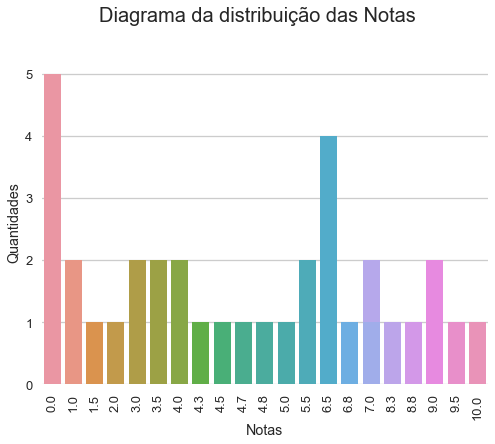

In [124]:
from scipy.stats import skew, kurtosis
t_1 = M12['nota'].dropna() #  Esse gráfico será em relação as notas dos alunos das 2 turmas
t_2 = N34['nota'].dropna()

skewness_M12 = skew(t_1.value_counts())
skewness_N34 = skew(t_2.value_counts())
kurtosis_M12 = kurtosis(t_1.value_counts())
kurtosis_N34 = kurtosis(t_2.value_counts())

plt.figure(figsize=(8,6))

sns.countplot(t_1)
sns.countplot(t_2)
sns.set_context("talk")
plt.suptitle("Diagrama da distribuição das Notas", fontsize=20, y = 1)
plt.ylabel("Quantidades")
plt.xlabel("Notas")
sns.set_style("whitegrid")
sns.despine(bottom=True, left=True, top=True, )
fig.tight_layout() # Ajusta a tela
plt.xticks(rotation=90)
print('Kurtosis da turma 1:  '+ str(kurtosis_M12))
print('Kurtosis da turma 2:  '+ str(kurtosis_N34))
print('Skew da turma 1:  '+ str(skewness_M12))
print('Skew da turma 1:  '+ str(skewness_N34))
plt.show()

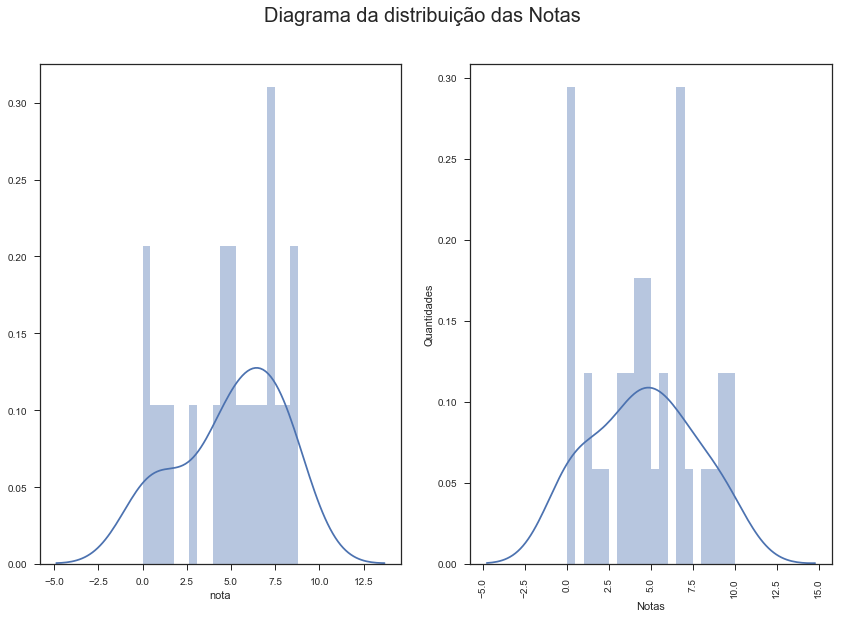

In [196]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,8), ncols=2, nrows=1)
fig.tight_layout()

sns.distplot(t_1, ax= ax1, bins=20)
sns.distplot(t_2, ax= ax2, bins=20)
sns.set_context("talk")
plt.suptitle("Diagrama da distribuição das Notas", fontsize=20, y = 1.06)
plt.ylabel("Quantidades")
plt.xlabel("Notas")
fig.tight_layout() # Ajusta a tela
plt.xticks(rotation=90)
plt.show()

# Questão 3 
###     Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções facetgrid e map) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos.

In [212]:
#Questão 3
turmas_LP= turmas_IMD_consolidadas[turmas_IMD_consolidadas['nome_ascii'].str.contains('LINGUAGEM DE PROGRAMACAO I')]
ids_turmas_LP = turmas_LP['id_turma'].unique()
notas_turmas_LP = notas_turmas_2017_1[(notas_turmas_2017_1['id_turma'] == ids_turmas_LP[0])| (notas_turmas_2017_1['id_turma'] == ids_turmas_LP[1]) | (notas_turmas_2017_1['id_turma'] == ids_turmas_LP[2]) | (notas_turmas_2017_1['id_turma'] == ids_turmas_LP[3]) | (notas_turmas_2017_1['id_turma'] == ids_turmas_LP[4]) | (notas_turmas_2017_1['id_turma'] == ids_turmas_LP[5])]
notas_turmas_LP = notas_turmas_LP.drop_duplicates(["id_discente"], 'last').dropna()

In [228]:
notas_turmas_LP["situacao"].unique()

array(['CANCELADO', 'APROVADO', 'APROVADO POR NOTA', 'REPROVADO',
       'REPROVADO POR MÉDIA E POR FALTAS', 'REPROVADO POR NOTA'], dtype=object)

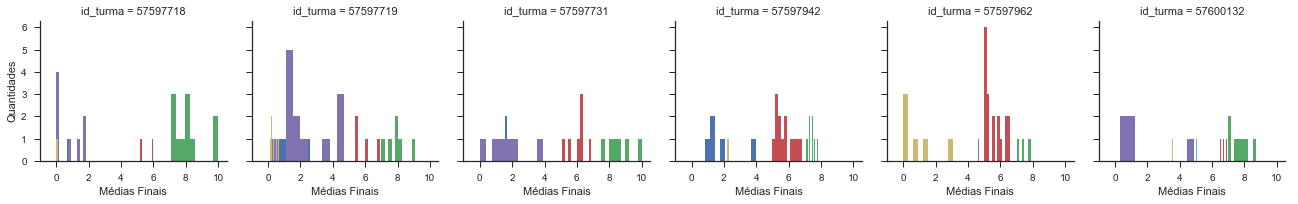

In [229]:
g5 = sns.FacetGrid(notas_turmas_LP, col='id_turma', hue='situacao')
g5.map(plt.hist, "media_final")
g5.set_xlabels("Médias Finais")
g5.set_ylabels("Quantidades")

sns.set_context("notebook")
sns.set_style("ticks")
plt.show()

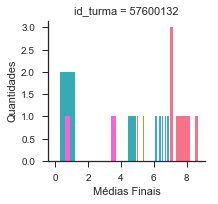

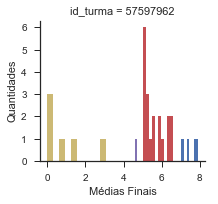

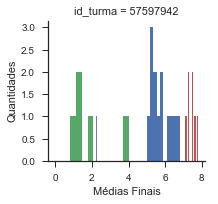

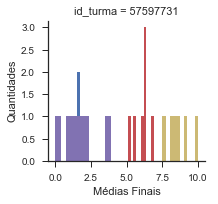

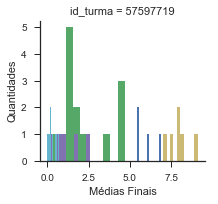

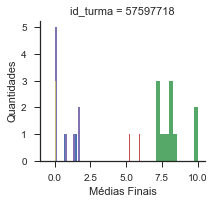

In [217]:
turma_5_LP = notas_turmas_LP
turma_4_LP = notas_turmas_LP
turma_3_LP = notas_turmas_LP
turma_2_LP = notas_turmas_LP
turma_1_LP = notas_turmas_LP
turma_0_LP = notas_turmas_LP


g5 = sns.FacetGrid(turma_5_LP, col='id_turma', hue='situacao')
g5.map(plt.hist, "media_final")
g5.set_xlabels("Médias Finais")
g5.set_ylabels("Quantidades")

g4 = sns.FacetGrid(turma_4_LP, col='id_turma', hue='situacao')
g4.map(plt.hist, "media_final")
g4.set_xlabels("Médias Finais")
g4.set_ylabels("Quantidades")

g3 = sns.FacetGrid(turma_3_LP, col='id_turma', hue='situacao')
g3.map(plt.hist, "media_final")
g3.set_xlabels("Médias Finais")
g3.set_ylabels("Quantidades")

g2 = sns.FacetGrid(turma_2_LP, col='id_turma', hue='situacao')
g2.map(plt.hist, "media_final")
g2.set_xlabels("Médias Finais")
g2.set_ylabels("Quantidades")

g1 = sns.FacetGrid(turma_1_LP, col='id_turma', hue='situacao')
g1.map(plt.hist, "media_final")
g1.set_xlabels("Médias Finais")
g1.set_ylabels("Quantidades")

g0 = sns.FacetGrid(turma_0_LP, col='id_turma', hue='situacao')
g0.map(plt.hist, "media_final")
g0.set_xlabels("Médias Finais")
g0.set_ylabels("Quantidades")

sns.set_context("notebook")
sns.set_style("ticks")
plt.show()

# Questão 4 
###     Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição.

In [107]:
turmas_EDB1= turmas_IMD_consolidadas[turmas_IMD_consolidadas['nome_ascii'].str.contains('ESTRUTURA DE DADOS BASICAS I' )]
ids_EDB1 = turmas_EDB1['id_turma'].unique()

turma_1_EDB1 = notas_turmas_2017_1[notas_turmas_2017_1['id_turma'] == ids_EDB1[0]].dropna()
turma_1_EDB1 = turma_1_EDB1.drop_duplicates(['id_discente'], keep='last')

turma_2_EDB1 = notas_turmas_2017_1[notas_turmas_2017_1['id_turma'] == ids_EDB1[1]].dropna()
turma_2_EDB1 = turma_2_EDB1.drop_duplicates(['id_discente'], keep='last')

turma_3_EDB1 = notas_turmas_2017_1[notas_turmas_2017_1['id_turma'] == ids_EDB1[2]].dropna()
turma_3_EDB1 = turma_3_EDB1.drop_duplicates(['id_discente'], keep='last')

turma_4_EDB1 = notas_turmas_2017_1[notas_turmas_2017_1['id_turma'] == ids_EDB1[3]].dropna()
turma_4_EDB1 = turma_4_EDB1.drop_duplicates(['id_discente'], keep='last')

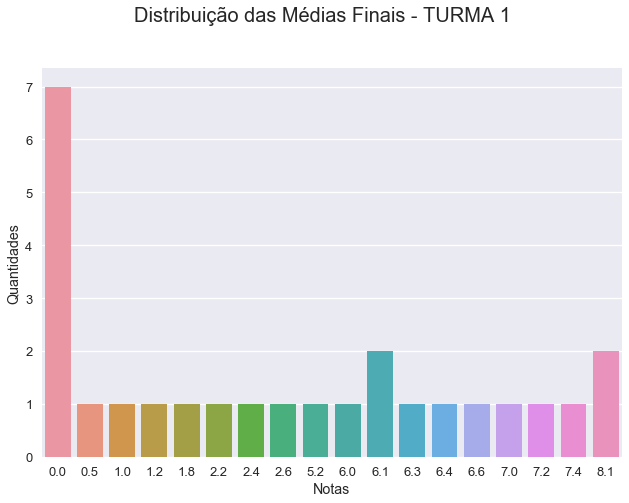

In [90]:
fig.tight_layout()
sns.countplot(turma_1_EDB1['media_final'])
plt.xlabel('Notas')
plt.ylabel("Quantidades")
plt.suptitle('Distribuição das Médias Finais - TURMA 1', fontsize= 20, y = 1)
plt.show()

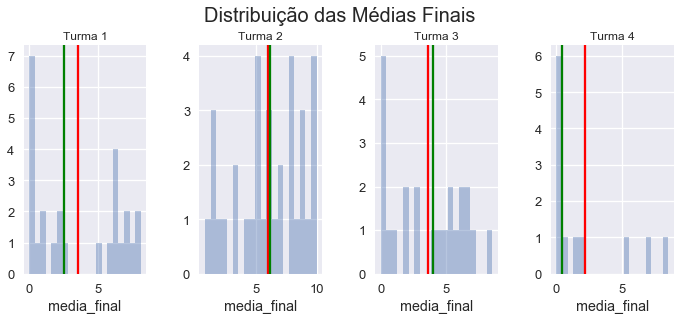

In [106]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10,4), ncols=4, nrows=1)
fig.tight_layout()

ax1.axvline(turma_1_EDB1['media_final'].mean(), color="r")
ax2.axvline(turma_2_EDB1['media_final'].mean(), color="r")
ax3.axvline(turma_3_EDB1['media_final'].mean(), color="r")
ax4.axvline(turma_4_EDB1['media_final'].mean(), color="r")

ax1.axvline(turma_1_EDB1['media_final'].median(), color="g")
ax2.axvline(turma_2_EDB1['media_final'].median(), color="g")
ax3.axvline(turma_3_EDB1['media_final'].median(), color="g")
ax4.axvline(turma_4_EDB1['media_final'].median(), color="g")

ax1.set_title("Turma 1" , fontsize= 12, y=1)
ax2.set_title("Turma 2", fontsize= 12, y =1)
ax3.set_title("Turma 3", fontsize= 12, y=1)
ax4.set_title("Turma 4", fontsize= 12, y=1)

sns.distplot(turma_1_EDB1['media_final'], kde=False, ax=ax1, bins= 20)
sns.distplot(turma_2_EDB1['media_final'], kde=False,  ax=ax2, bins= 20)
sns.distplot(turma_3_EDB1['media_final'], kde=False, ax=ax3, bins= 20)
sns.distplot(turma_4_EDB1['media_final'], kde=False, ax=ax4, bins= 20)
plt.suptitle('Distribuição das Médias Finais', fontsize= 20, y = 1.06)
plt.show()